<a href="https://colab.research.google.com/github/JWKKWJ123/google-colab/blob/main/plot_heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nibabel as nib
import math
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import matplotlib.pyplot as plt
import einops
import glob
import time
import einops
from sklearn.metrics import accuracy_score,recall_score,roc_curve, classification_report,confusion_matrix,precision_score,roc_auc_score, auc
import random
from sklearn.model_selection import StratifiedKFold
import math
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import einops
import glob
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from scipy import ndimage
from scipy.ndimage import gaussian_filter
import nibabel as nib
from matplotlib.gridspec import GridSpec






In [ ]:
def plot_transverse_slices(struct_arr, num_slices=6, cmap='gray', vmin=None, vmax=None, overlay=None,
                         overlay_cmap='hot', overlay_vmin=None, overlay_vmax=None, _class=None, iteration=0):
    """
    Plot selected transverse (z-axis) slices of a 3D image (and an overlay) from the middle 25%-75% region.
    Ensures that the colorbar does not overlap the image and has a reasonable height.
    """
    # Set default vmin/vmax if not provided
    if vmin is None:
        vmin = struct_arr.min()
    if vmax is None:
        vmax = struct_arr.max()
    if overlay_vmin is None and overlay is not None:
        overlay_vmin = overlay.min()
    if overlay_vmax is None and overlay is not None:
        overlay_vmax = overlay.max()

    print(vmin, vmax, overlay_vmin, overlay_vmax)

    # Define slice indices for the middle 25%-75% range along the z-axis only
    start = int(struct_arr.shape[2] * 0.25)
    end = int(struct_arr.shape[2] * 0.75)
    slice_indices = np.linspace(start, end, num_slices, dtype=int)

    # Create figure with GridSpec (reserve space for colorbar)
    fig = plt.figure(figsize=(num_slices * 2, 6))
    gs = GridSpec(1, num_slices + 1, width_ratios=[1] * num_slices + [0.05])  # Reserve extra column for colorbar

    # Loop over selected slices in the z-axis
    for i in range(num_slices):
        ax = fig.add_subplot(gs[0, i])  # Use GridSpec for positioning
        i_slice = slice_indices[i]

        ax.axis('off')
        ax.imshow(ndimage.rotate(struct_arr[:, :, i_slice], 90), vmin=vmin, vmax=vmax, cmap=cmap, interpolation=None)
        ax.text(0.03, 0.97, f'z={i_slice}', color='white',
                horizontalalignment='left', verticalalignment='top', transform=ax.transAxes)

        # Overlay heatmap
        if overlay is not None:
            im = ax.imshow(ndimage.rotate(overlay[:, :, i_slice], 90),
                           cmap=overlay_cmap, vmin=overlay_vmin, vmax=overlay_vmax,
                           interpolation=None, alpha=0.7)

    # Adjust colorbar size to match the height of image row
    if overlay is not None:
        cbar_ax = fig.add_axes([0.92, 0.35, 0.02, 0.3])  # [left, bottom, width, height]
        fig.colorbar(im, cax=cbar_ax)

    # Save the plotted heatmap slice
    plt.show()
    #plt.savefig(f'plot_ADNI/Vol-EBM_ADNI_ADCN_transverse_{iteration}.jpg', bbox_inches='tight')
    plt.close(fig)

In [ ]:



#colors = ['black','blue','orange','red']
colors = ['black','black','blue','orange','gold','tomato','red']
#colors = ['red','tomato','blue','orange','gold','black','black']
#colors = ['blue','green','black','gold','red']

color_list = ListedColormap(colors)

mycmap = LinearSegmentedColormap.from_list('mycmap', colors)





def plot_slices(struct_arr, num_slices=6, cmap='gray', vmin=None, vmax=None, overlay=None,
                overlay_cmap='hot', overlay_vmin=None, overlay_vmax=None, _class=None, iteration=0):
    """
    Plot equally spaced slices of a 3D image (and an overlay) along every axis with an overlay colorbar.
    """
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy import ndimage

    if vmin is None:
        vmin = struct_arr.min()
    if vmax is None:
        vmax = struct_arr.max()
    if overlay_vmin is None and overlay is not None:
        overlay_vmin = overlay.min()
    if overlay_vmax is None and overlay is not None:
        overlay_vmax = overlay.max()
    print(vmin, vmax, overlay_vmin, overlay_vmax)

    # Create the figure and axes grid
    fig, axes = plt.subplots(3, num_slices, figsize=(num_slices * 2, 6))
    intervals = np.asarray(struct_arr.shape) / num_slices
    print(intervals)

    # Add the overlay colorbar (if overlay is provided)
    if overlay is not None:
        cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6])  # Position: [left, bottom, width, height]

    for axis, axis_label in zip([0, 1, 2], ['x', 'y', 'z']):
        for i, ax in enumerate(axes[axis]):
            i_slice = int(np.round(intervals[axis] / 2 + i * intervals[axis]))

            plt.sca(ax)
            plt.axis('off')
            ax.imshow(ndimage.rotate(np.take(struct_arr, i_slice, axis=axis), 90),
                      vmin=vmin, vmax=vmax, cmap=cmap, interpolation=None)
            ax.text(0.03, 0.97, '{}={}'.format(axis_label, i_slice), color='white',
                    horizontalalignment='left', verticalalignment='top', transform=ax.transAxes)

            if overlay is not None:
                im = ax.imshow(ndimage.rotate(np.take(overlay, i_slice, axis=axis), 90),
                               cmap=overlay_cmap, vmin=overlay_vmin, vmax=overlay_vmax,
                               interpolation=None, alpha=0.7)

    # Add colorbar for the overlay
    if overlay is not None:
        fig.colorbar(im, cax=cbar_ax, label='Colorbar')

    plt.show()

    #if _class == 0:
        #plt.savefig('plot_ADNI/Pmap_GM_ADCN_1_10.jpg'.format(iteration))
    #if _class == 1:
        #plt.savefig('plot/test_6_{}.jpg'.format(iteration), bbox_inches='tight')






def plot_selected_slices(struct_arr, num_slices=6, cmap='gray', vmin=None, vmax=None, overlay=None,
                         overlay_cmap='hot', overlay_vmin=None, overlay_vmax=None, _class=None, iteration=0):
    """
    Plot slices of a 3D image (and an overlay) along every axis, restricted to the middle 25%-75% region.
    """
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy import ndimage
    from matplotlib.gridspec import GridSpec

    if vmin is None:
        vmin = struct_arr.min()
    if vmax is None:
        vmax = struct_arr.max()
    if overlay_vmin is None and overlay is not None:
        overlay_vmin = overlay.min()
    if overlay_vmax is None and overlay is not None:
        overlay_vmax = overlay.max()
    print(vmin, vmax, overlay_vmin, overlay_vmax)

    # Create the figure with GridSpec for precise control
    fig = plt.figure(figsize=(num_slices * 2, 6))
    gs = GridSpec(3, num_slices, figure=fig, wspace=0.05, hspace=0.02)  # Reduced hspace to minimize row spacing

    # Define slice indices for the middle 25%-75% range
    slice_ranges = []
    for axis in range(3):
        start = int(struct_arr.shape[axis] * 0.25)
        end = int(struct_arr.shape[axis] * 0.75)
        indices = np.linspace(start, end, num_slices, dtype=int)
        slice_ranges.append(indices)

    # Add the overlay colorbar (if overlay is provided)
    cbar_ax = None
    if overlay is not None:
        cbar_ax = fig.add_axes([0.92, 0.2, 0.015, 0.6])  # Adjusted colorbar position and size

    for axis, axis_label in zip([0, 1, 2], ['x', 'y', 'z']):
        for i in range(num_slices):
            ax = fig.add_subplot(gs[axis, i])  # Use GridSpec to position subplots
            i_slice = slice_ranges[axis][i]

            ax.axis('off')
            ax.imshow(ndimage.rotate(np.take(struct_arr, i_slice, axis=axis), 90),
                      vmin=vmin, vmax=vmax, cmap=cmap, interpolation=None)
            ax.text(0.03, 0.97, '{}={}'.format(axis_label, i_slice), color='white',
                    horizontalalignment='left', verticalalignment='top', transform=ax.transAxes)

            if overlay is not None:
                im = ax.imshow(ndimage.rotate(np.take(overlay, i_slice, axis=axis), 90),
                               cmap=overlay_cmap, vmin=overlay_vmin, vmax=overlay_vmax,
                               interpolation=None, alpha=0.7)

    # Add colorbar for the overlay
    if overlay is not None:
        fig.colorbar(im, cax=cbar_ax)

    # Save the plotted heatmap slice (optional; specify appropriate file path)
    plt.show()
    #plt.savefig(f'plot_ADNI/VBMSVM_pmap_ADNI_ADCN_select_{iteration}.jpg', bbox_inches='tight')
    #plt.close(fig)










In [ ]:


#colors = ['black','blue','orange','red']
colors = ['black','blue','orange','gold','tomato','red']

#colors = ['blue','green','black','gold','red']

color_list = ListedColormap(colors)

mycmap = LinearSegmentedColormap.from_list('mycmap', colors)


img_seg = "/content/drive/MyDrive/aparcaseg_in_MNI.nii.gz"
img_seg = nib.load(img_seg).get_fdata()
img_seg= np.array(img_seg)

#x_train = x_train[15:165,20:200,15:165]
img_seg = img_seg[16:166,19:199,16:166]

heatmap: 0.0 0.006126256347860206 0.3093205157456929
heatmap_filter: 0.0 0.006126256347860206 0.3093205157456929
0.0 1.0 0.0 0.3093205157456929
[18.75 22.5  18.75]


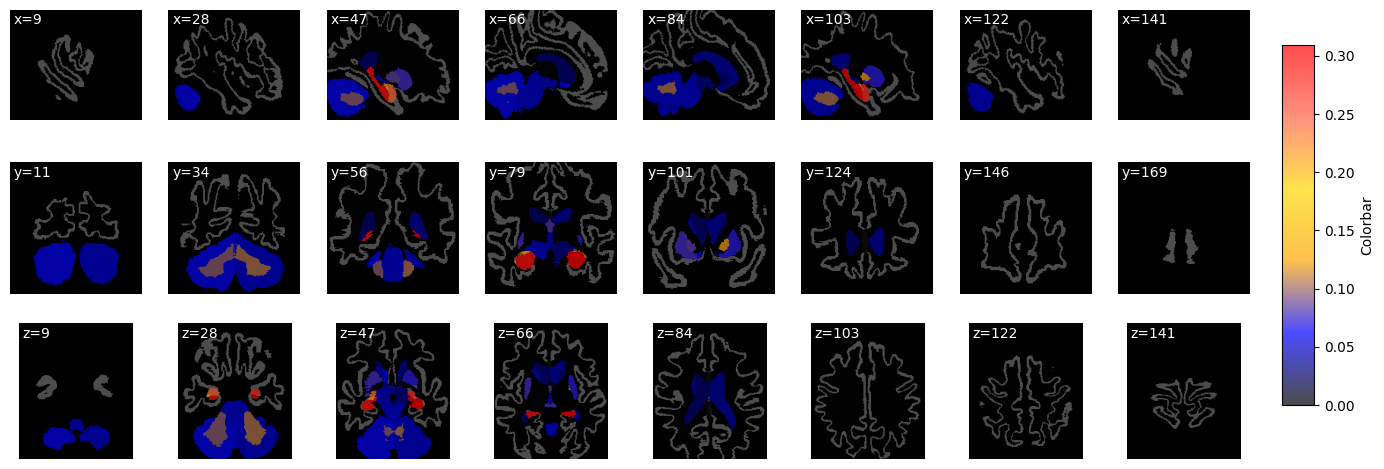

In [ ]:
heatmap = np.load("/content/drive/MyDrive/Vol_ADCN_weights_.npy")
#heatmap = np.load("/content/drive/MyDrive/Vol_ADCN_SVM_weights_.npy")


heatmap = abs(heatmap)
print('heatmap:',np.min(heatmap),np.mean(heatmap),np.max(heatmap))



img_npy = img_seg

# ??????????
mid_slice = img_npy.shape[0] // 2

# ??????
left_hemisphere = img_npy[:mid_slice, :, :]
right_hemisphere = img_npy[mid_slice:, :, :]

# ?????????
left_norm = (left_hemisphere - np.min(left_hemisphere)) / (np.max(left_hemisphere) - np.min(left_hemisphere))
right_norm = (right_hemisphere - np.min(right_hemisphere)) / (np.max(right_hemisphere) - np.min(right_hemisphere))

# ???????????
img_npy = np.concatenate((left_norm, right_norm), axis=0)







# ?????heatmap????
if img_npy.shape != heatmap.shape:
    raise ValueError("Template and heatmap shapes do not match!")

# ?heatmap??????????
heatmap_filter = np.where(img_npy == 0, 0, heatmap)


# ????
print('heatmap_filter:', np.min(heatmap_filter), np.mean(heatmap_filter), np.max(heatmap_filter))


heatmap = heatmap_filter


'''

plt.figure(figsize=(8, 6))
plt.hist(heatmap.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Heatmap Weights')
plt.xlabel('Value')
plt.ylabel('Frequency')
'''
# ?????
#plt.savefig("/trinity/home/wkang/paper5/visualization/plot/Vol_SVM_pmap_histogram.png")

#heatmap = ((heatmap- np.mean(heatmap))/ (np.max(heatmap)-np.min(heatmap))+1)/2



#heatmap[heatmap<np.percentile(heatmap, 80)]=0
#heatmap = gaussian_filter(heatmap, sigma=1.5)



plot_slices(img_npy, overlay=heatmap, overlay_cmap=mycmap,_class=0,num_slices=8)
#plot_transverse_slices(img_npy, overlay=heatmap_filter, overlay_cmap=mycmap,_class=0,num_slices=1,iteration = 0)



#occ_CN = ((occ_CN - np.mean(occ_CN))/ (np.max(occ_CN)-np.min(occ_CN))+1)/2

In [ ]:
# 确保 `img_npy` 是正确的 NumPy 数组
if 'img_npy' not in globals():
    raise ValueError("❌ Error: img_npy is not defined in the notebook environment!")

if img_npy is None:
    raise ValueError("❌ Error: img_npy is None. Check if it was redefined or lost in execution.")

if not isinstance(img_npy, np.ndarray):
    raise ValueError(f"❌ Error: img_npy is not a NumPy array (found {type(img_npy)}).")

if img_npy.size == 0:
    raise ValueError("❌ Error: img_npy is an empty array. Please check your data source.")

print(f"✅ img_npy shape: {img_npy.shape}, dtype: {img_npy.dtype}")

✅ img_npy shape: (150, 180, 150), dtype: float64


In [ ]:
def plot_slices(struct_arr, num_slices=6, cmap='gray', vmin=None, vmax=None, overlay=None,
                overlay_cmap='hot', overlay_vmin=None, overlay_vmax=None, _class=None, iteration=0):
    """
    Plot equally spaced slices of a 3D image (and an overlay) along every axis with an overlay colorbar.
    """

    if vmin is None:
        vmin = struct_arr.min()
    if vmax is None:
        vmax = struct_arr.max()
    if overlay_vmin is None and overlay is not None:
        overlay_vmin = overlay.min()
    if overlay_vmax is None and overlay is not None:
        overlay_vmax = overlay.max()
    #print(vmin, vmax, overlay_vmin, overlay_vmax)

    # Create the figure and axes grid
    fig, axes = plt.subplots(3, num_slices, figsize=(num_slices * 2, 6), squeeze=False)  # ✅ 解决 num_slices=1 的问题
    intervals = np.asarray(struct_arr.shape) / num_slices
    #print(intervals)

    # Add the overlay colorbar (if overlay is provided)
    if overlay is not None:
        cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6])  # Position: [left, bottom, width, height]

    for axis, axis_label in zip([0, 1, 2], ['x', 'y', 'z']):
        for i, ax in enumerate(axes[axis]):  # ✅ 现在 axes 始终是 2D 结构
            i_slice = int(np.round(intervals[axis] / 2 + i * intervals[axis]))

            plt.sca(ax)
            plt.axis('off')
            ax.imshow(ndimage.rotate(np.take(struct_arr, i_slice, axis=axis), 90),
                      vmin=vmin, vmax=vmax, cmap=cmap, interpolation=None)
            ax.text(0.03, 0.97, '{}={}'.format(axis_label, i_slice), color='white',
                    horizontalalignment='left', verticalalignment='top', transform=ax.transAxes)

            if overlay is not None:
                im = ax.imshow(ndimage.rotate(np.take(overlay, i_slice, axis=axis), 90),
                               cmap=overlay_cmap, vmin=overlay_vmin, vmax=overlay_vmax,
                               interpolation=None, alpha=0.7)

    # Add colorbar for the overlay
    if overlay is not None:
        fig.colorbar(im, cax=cbar_ax, label='Colorbar')

    plt.show()

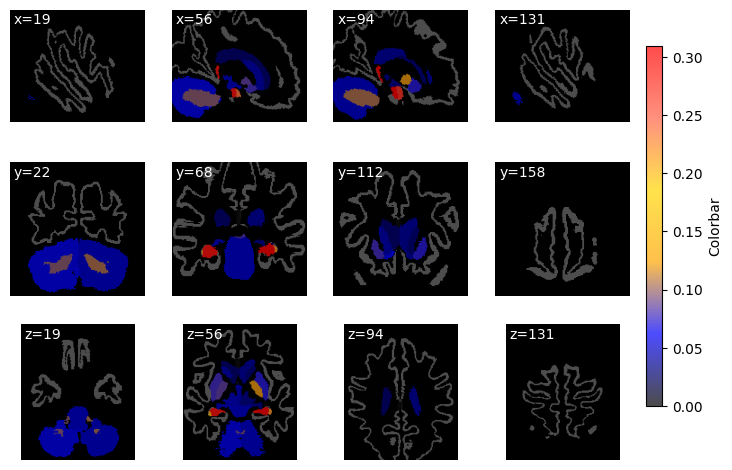

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from matplotlib.gridspec import GridSpec
from IPython.display import display
from ipywidgets import interactive_output
import ipywidgets as widgets

# 交互式滑动条
num_slices_slider = widgets.IntSlider(
    value=8, min=1, max=12, step=1, description='Num Slices', continuous_update=False
)

# 使用 interactive_output 替代 interactive
interactive_plot = interactive_output(
    plot_slices,
    {
        "struct_arr": widgets.fixed(img_npy),  # ✅ 这里也用 fixed，但 interactive_output 处理更稳定
        "num_slices": num_slices_slider,
        "overlay": widgets.fixed(heatmap),
        "overlay_cmap": widgets.fixed(mycmap),
        "_class": widgets.fixed(0),
    }
)

# 显示滑动条和绘图
display(num_slices_slider)
display(interactive_plot)


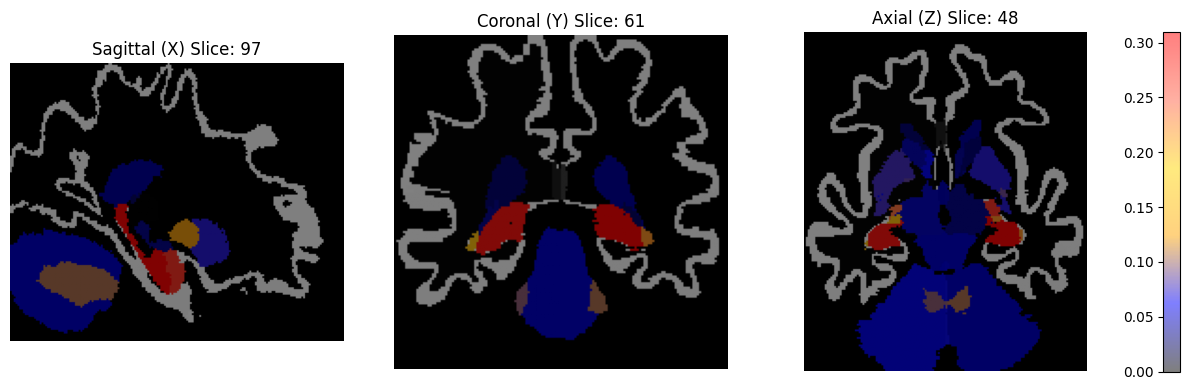

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
import ipywidgets as widgets
from ipywidgets import interactive_output
from IPython.display import display

# Function to visualize three manually selected slices (interactive)
def interactive_slice_viewer(struct_arr, x_slice, y_slice, z_slice, cmap='gray', vmin=None, vmax=None,
                              overlay=None, overlay_cmap=None, overlay_vmin=None, overlay_vmax=None):
    """
    Display a single figure containing three **manually selected** slices:
    - Sagittal (X-plane) at `x_slice`
    - Coronal (Y-plane) at `y_slice`
    - Axial (Z-plane) at `z_slice`

    Uses an interactive UI to select slices dynamically.
    """

    # Set default min/max values if not provided
    if vmin is None:
        vmin = struct_arr.min()
    if vmax is None:
        vmax = struct_arr.max()
    if overlay is not None:
        if overlay_vmin is None:
            overlay_vmin = overlay.min()
        if overlay_vmax is None:
            overlay_vmax = overlay.max()

    # Create a figure with 3 subplots and extra space for the colorbar
    fig, axes = plt.subplots(1, 4, figsize=(12, 4), gridspec_kw={"width_ratios": [1, 1, 1, 0.05]})

    # Sagittal View (X-slice)
    img1 = axes[0].imshow(ndimage.rotate(struct_arr[x_slice, :, :], 90), cmap=cmap, vmin=vmin, vmax=vmax)
    overlay_img = None
    if overlay is not None:
        overlay_img = axes[0].imshow(ndimage.rotate(overlay[x_slice, :, :], 90), cmap=overlay_cmap,
                                     vmin=overlay_vmin, vmax=overlay_vmax, alpha=0.5)
    axes[0].set_title(f"Sagittal (X) Slice: {x_slice}")
    axes[0].axis("off")

    # Coronal View (Y-slice)
    img2 = axes[1].imshow(ndimage.rotate(struct_arr[:, y_slice, :], 90), cmap=cmap, vmin=vmin, vmax=vmax)
    if overlay is not None:
        overlay_img = axes[1].imshow(ndimage.rotate(overlay[:, y_slice, :], 90), cmap=overlay_cmap,
                                     vmin=overlay_vmin, vmax=overlay_vmax, alpha=0.5)
    axes[1].set_title(f"Coronal (Y) Slice: {y_slice}")
    axes[1].axis("off")

    # Axial View (Z-slice)
    img3 = axes[2].imshow(ndimage.rotate(struct_arr[:, :, z_slice], 90), cmap=cmap, vmin=vmin, vmax=vmax)
    if overlay is not None:
        overlay_img = axes[2].imshow(ndimage.rotate(overlay[:, :, z_slice], 90), cmap=overlay_cmap,
                                     vmin=overlay_vmin, vmax=overlay_vmax, alpha=0.5)
    axes[2].set_title(f"Axial (Z) Slice: {z_slice}")
    axes[2].axis("off")

    # Add a shared colorbar in the fourth column **without overlapping**
    if overlay is not None and overlay_img is not None:
        cbar_ax = axes[3]  # Use the fourth subplot as the colorbar
        fig.colorbar(overlay_img, cax=cbar_ax)
        cbar_ax.yaxis.set_ticks_position('left')  # Move ticks to the left for better alignment

    plt.tight_layout()
    plt.show()


# Create sliders for manual slice selection
x_slider = widgets.IntSlider(value=75, min=0, max=149, step=1, description='Sagittal (X)', continuous_update=False)
y_slider = widgets.IntSlider(value=90, min=0, max=179, step=1, description='Coronal (Y)', continuous_update=False)
z_slider = widgets.IntSlider(value=75, min=0, max=149, step=1, description='Axial (Z)', continuous_update=False)

# Interactive output (replace None with actual data)
interactive_plot = interactive_output(
    interactive_slice_viewer,
    {
        "struct_arr": widgets.fixed(img_npy),  # Your 3D image data
        "x_slice": x_slider,
        "y_slice": y_slider,
        "z_slice": z_slider,
        "overlay": widgets.fixed(heatmap),  # Your overlay data
        "overlay_cmap": widgets.fixed(mycmap),  # Use your colormap
    }
)

# Display widgets and interactive plot
display(x_slider, y_slider, z_slider)
display(interactive_plot)




In [ ]:
def plot_transverse_heatmaps(struct_arr, heatmaps, z_coord, cmap='gray', vmin=None, vmax=None,
                             overlay_cmap='hot', overlay_vmin=None, overlay_vmax=None):
    """
    Plot a single transverse (z-axis) slice for multiple models at the specified z coordinate.

    Parameters:
    - struct_arr: 3D array (Base anatomical structure image)
    - heatmaps: Dictionary of {model_name: 3D heatmap array}
    - z_coord: Integer, specifies the z slice to display (Range: [0, 180])
    - cmap: Colormap for base image
    - vmin, vmax: Intensity range for base image
    - overlay_cmap: Colormap for overlay heatmaps
    - overlay_vmin, overlay_vmax: Intensity range for heatmaps
    """
    # Set default vmin/vmax for structural image
    if vmin is None:
        vmin = struct_arr.min()
    if vmax is None:
        vmax = struct_arr.max()

    num_models = len(heatmaps)

    # Create figure with GridSpec (extra column reserved for colorbar)
    fig = plt.figure(figsize=(num_models * 4, 4))
    gs = GridSpec(1, num_models + 1, width_ratios=[1] * num_models + [0.05])  # Reserve space for colorbar

    # Plot each model's heatmap
    for i, (model_name, heatmap) in enumerate(heatmaps.items()):
        ax = fig.add_subplot(gs[0, i])
        ax.axis('off')

        # Display base anatomical structure
        ax.imshow(ndimage.rotate(struct_arr[:, :, z_coord], 90), vmin=vmin, vmax=vmax, cmap=cmap, interpolation=None)
        ax.text(0.03, 0.97, f'{model_name}\n(z={z_coord})', color='white',
                horizontalalignment='left', verticalalignment='top', transform=ax.transAxes)

        # Overlay heatmap
        im = ax.imshow(ndimage.rotate(heatmap[:, :, z_coord], 90), cmap=overlay_cmap,
                       vmin=overlay_vmin, vmax=overlay_vmax, interpolation=None, alpha=0.7)

    # Add colorbar
    cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6])  # Position: [left, bottom, width, height]
    fig.colorbar(im, cax=cbar_ax)

    # Show plot
    plt.show()

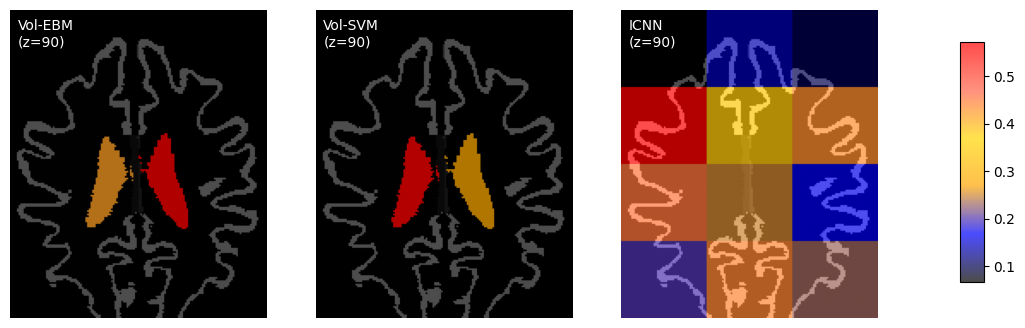

In [ ]:


heatmap_Vol_EBM = abs(np.load("/content/drive/MyDrive/Vol_ADCN_weights_.npy"))
heatmap_Vol_SVM = abs(np.load("/content/drive/MyDrive/Vol_ADCN_SVM_weights_.npy"))
heatmap_ICNN = abs(np.load("/content/drive/MyDrive/DL_ADCN_weights_.npy"))




#heatmap = abs(heatmap)




# 假设 struct_arr, heatmap_Vol_SVM, heatmap_Vol_EBM 是 3D numpy 数组
heatmaps = {

    "Vol-EBM": heatmap_Vol_EBM,
    "Vol-SVM": heatmap_Vol_SVM,
    "ICNN": heatmap_ICNN

}

# 设定 z 坐标（例如 z=90）
plot_transverse_heatmaps(img_npy, heatmaps, overlay_cmap=mycmap,z_coord=90)

In [ ]:
def interactive_slider(img_npy, heatmaps, overlay_cmap='hot'):
    """
    Create an interactive slider to control the z slice dynamically.
    This function does NOT modify the original `plot_transverse_heatmaps()` function.

    Parameters:
    - img_npy: 3D base anatomical image
    - heatmaps: Dictionary {model_name: 3D heatmap array}
    - overlay_cmap: Colormap for heatmaps (default: 'hot')
    """
    max_z = img_npy.shape[2] - 1  # 最大 z 轴索引
    z_slider = widgets.IntSlider(value=max_z // 2, min=0, max=max_z, step=1, description="Z Slice")

    # 输出区域
    output = widgets.Output()

    def update_plot(z_coord):
        with output:
            output.clear_output(wait=True)
            # 调用 `plot_transverse_heatmaps()`，保证与之前的调用方式一致
            plot_transverse_heatmaps(img_npy, heatmaps, overlay_cmap=overlay_cmap, z_coord=z_coord)

    # 绑定滑动条到绘图函数
    widgets.interactive(update_plot, z_coord=z_slider)

    # 显示滑动条和输出区域
    display(z_slider, output)

# 运行交互界面（示例）
interactive_slider(img_npy, heatmaps, overlay_cmap=mycmap)

IntSlider(value=74, description='Z Slice', max=149)

Output()

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import ipywidgets as widgets
from IPython.display import display

def plot_transverse_heatmaps(img_npy, heatmaps, z_coord, cmap='gray', vmin=None, vmax=None,
                             overlay_cmap='hot', overlay_vmin=None, overlay_vmax=None):
    """
    Plot multiple heatmaps at a specified z slice, each with its own colorbar and independent scale.

    Parameters:
    - img_npy: 3D array (Base anatomical structure image)
    - heatmaps: Dictionary of {model_name: 3D heatmap array}
    - z_coord: Integer, specifies the z slice to display
    - cmap: Colormap for base image
    - vmin, vmax: Intensity range for base image
    - overlay_cmap: Colormap for overlay heatmaps
    - overlay_vmin, overlay_vmax: Intensity range for each heatmap (independent per model)
    """
    num_models = len(heatmaps)

    # Create individual subplots for each model
    fig, axes = plt.subplots(1, num_models, figsize=(num_models * 3, 4), constrained_layout=True)

    # If only one model, axes is not a list
    if num_models == 1:
        axes = [axes]

    for ax, (model_name, heatmap) in zip(axes, heatmaps.items()):
        ax.axis('off')

        # Compute vmin/vmax for this specific heatmap
        local_vmin = overlay_vmin if overlay_vmin is not None else heatmap.min()
        local_vmax = overlay_vmax if overlay_vmax is not None else heatmap.max()

        # Plot anatomical base image
        ax.imshow(ndimage.rotate(img_npy[:, :, z_coord], 90), vmin=vmin, vmax=vmax, cmap=cmap, interpolation=None)
        ax.text(0.03, 0.97, f'{model_name}\n(z={z_coord})', color='white',
                horizontalalignment='left', verticalalignment='top', transform=ax.transAxes)

        # Overlay heatmap
        im = ax.imshow(ndimage.rotate(heatmap[:, :, z_coord], 90), cmap=overlay_cmap,
                       vmin=local_vmin, vmax=local_vmax, interpolation=None, alpha=0.7)

        # Add independent colorbar with correct scaling
        cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
        cbar.ax.tick_params(labelsize=7)  # Reduce font size

    # Show plot
    plt.show()


def interactive_slider(img_npy, heatmaps, overlay_cmap='hot'):
    """
    Create an interactive slider to control the z slice dynamically,
    ensuring that each model has its own independent colorbar.

    Parameters:
    - img_npy: 3D base anatomical image
    - heatmaps: Dictionary {model_name: 3D heatmap array}
    - overlay_cmap: Colormap for heatmaps
    """
    max_z = img_npy.shape[2] - 1  # Max slice index
    z_slider = widgets.IntSlider(value=max_z // 2, min=0, max=max_z, step=1, description="Z Slice")

    # Output area
    output = widgets.Output()

    def update_plot(z_coord):
        with output:
            output.clear_output(wait=True)
            # Call function ensuring colorbars are independent and fixed
            plot_transverse_heatmaps(img_npy, heatmaps, z_coord, overlay_cmap=overlay_cmap)

    # Bind slider to function
    widgets.interactive(update_plot, z_coord=z_slider)

    # Display slider and output
    display(z_slider, output)

# Example usage (assuming img_npy, heatmap_Vol_SVM, heatmap_Vol_EBM exist)
heatmaps = {
    "Vol-SVM": heatmap_Vol_SVM,
    "Vol-EBM": heatmap_Vol_EBM,
    "ICNN": heatmap_ICNN,

}

# Run interactive UI with your custom colormap
interactive_slider(img_npy, heatmaps, overlay_cmap=mycmap)


IntSlider(value=74, description='Z Slice', max=149)

Output()